In [1]:
# imports
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

In [3]:
import os

FRUITS_DIR = '/Users/cayler/Downloads/fruits-360/Training/'
TEST_DIR = '/Users/cayler/Downloads/fruits-360/Test/'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
# list training classes
np.array([os.listdir(FRUITS_DIR)]).size
classes = np.array(os.listdir(os.path.join(FRUITS_DIR)))

In [5]:
rand_class = random.randint(0, classes.size)
test_img = mpimg.imread(FRUITS_DIR + 'Pear/247_100.jpg')
np.array(os.listdir(FRUITS_DIR + classes[rand_class])).size

490

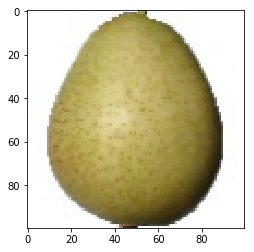

In [6]:
plt.imshow(test_img)

In [22]:
# some constants
# image size = 100 x 100
num_classes = 93
num_epochs = 5
batch_size = 2**5
learning_rate = 0.01

transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

In [66]:
train_set = torchvision.datasets.ImageFolder(FRUITS_DIR, transform=transform)
test_set = torchvision.datasets.ImageFolder(TEST_DIR, transform=transform)

In [68]:
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [60]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 20, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(2420, 512), 
            nn.ReLU(), 
            nn.Dropout(p=0.4)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(512, num_classes)
        )
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [61]:
model = ConvNet(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


torch.Size([1, 512])

In [62]:

x = torch.ones(3, 100, 100)
x = model.layer1(x.unsqueeze(0))
x = model.layer2(x)
x = x.reshape(x.size(0), -1)
x = model.fc1(x)
x = model.fc2(x)
x.shape

torch.Size([1, 512])

In [63]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model.forward(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/1488], Loss: 3.1904


Epoch [1/5], Step [200/1488], Loss: 3.4374


Epoch [1/5], Step [300/1488], Loss: 2.9095


Epoch [1/5], Step [400/1488], Loss: 2.0304


Epoch [1/5], Step [500/1488], Loss: 2.0405


Epoch [1/5], Step [600/1488], Loss: 2.1926


Epoch [1/5], Step [700/1488], Loss: 1.9063


Epoch [1/5], Step [800/1488], Loss: 1.9468


Epoch [1/5], Step [900/1488], Loss: 1.7739


Epoch [1/5], Step [1000/1488], Loss: 1.1806


Epoch [1/5], Step [1100/1488], Loss: 1.3128


Epoch [1/5], Step [1200/1488], Loss: 1.6352


Epoch [1/5], Step [1300/1488], Loss: 1.3209


Epoch [1/5], Step [1400/1488], Loss: 1.2540


Epoch [2/5], Step [100/1488], Loss: 0.9371


Epoch [2/5], Step [200/1488], Loss: 1.1345


Epoch [2/5], Step [300/1488], Loss: 1.4513


Epoch [2/5], Step [400/1488], Loss: 1.0545


Epoch [2/5], Step [500/1488], Loss: 1.1575


Epoch [2/5], Step [600/1488], Loss: 0.8813


Epoch [2/5], Step [700/1488], Loss: 1.9487


Epoch [2/5], Step [800/1488], Loss: 1.2181


Epoch [2/5], Step [900/1488], Loss: 1.2585


Epoch [2/5], Step [1000/1488], Loss: 1.5992


Epoch [2/5], Step [1100/1488], Loss: 1.2628


Epoch [2/5], Step [1200/1488], Loss: 1.2085


Epoch [2/5], Step [1300/1488], Loss: 1.1048


Epoch [2/5], Step [1400/1488], Loss: 0.9393


Epoch [3/5], Step [100/1488], Loss: 0.8889


Epoch [3/5], Step [200/1488], Loss: 0.9320


Epoch [3/5], Step [300/1488], Loss: 1.7717


Epoch [3/5], Step [400/1488], Loss: 0.6613


Epoch [3/5], Step [500/1488], Loss: 0.7680


Epoch [3/5], Step [600/1488], Loss: 1.0053


Epoch [3/5], Step [700/1488], Loss: 0.7284


Epoch [3/5], Step [800/1488], Loss: 0.8531


Epoch [3/5], Step [900/1488], Loss: 0.5772


Epoch [3/5], Step [1000/1488], Loss: 1.1956


Epoch [3/5], Step [1100/1488], Loss: 0.5110


Epoch [3/5], Step [1200/1488], Loss: 1.2612


Epoch [3/5], Step [1300/1488], Loss: 0.5536


Epoch [3/5], Step [1400/1488], Loss: 0.8391


Epoch [4/5], Step [100/1488], Loss: 0.2949


Epoch [4/5], Step [200/1488], Loss: 0.5363


Epoch [4/5], Step [300/1488], Loss: 0.7087


Epoch [4/5], Step [400/1488], Loss: 0.9692


Epoch [4/5], Step [500/1488], Loss: 0.5902


Epoch [4/5], Step [600/1488], Loss: 0.6499


Epoch [4/5], Step [700/1488], Loss: 0.3391


Epoch [4/5], Step [800/1488], Loss: 0.9650


Epoch [4/5], Step [900/1488], Loss: 0.9128


Epoch [4/5], Step [1000/1488], Loss: 1.7817


Epoch [4/5], Step [1100/1488], Loss: 0.9197


Epoch [4/5], Step [1200/1488], Loss: 0.2310


Epoch [4/5], Step [1300/1488], Loss: 0.3709


Epoch [4/5], Step [1400/1488], Loss: 0.6679


Epoch [5/5], Step [100/1488], Loss: 1.8943


Epoch [5/5], Step [200/1488], Loss: 0.9568


Epoch [5/5], Step [300/1488], Loss: 0.6876


Epoch [5/5], Step [400/1488], Loss: 0.4815


Epoch [5/5], Step [500/1488], Loss: 0.5896


Epoch [5/5], Step [600/1488], Loss: 0.6752


Epoch [5/5], Step [700/1488], Loss: 0.8891


Epoch [5/5], Step [800/1488], Loss: 0.8017


Epoch [5/5], Step [900/1488], Loss: 0.3911


Epoch [5/5], Step [1000/1488], Loss: 0.8419


Epoch [5/5], Step [1100/1488], Loss: 0.5957


Epoch [5/5], Step [1200/1488], Loss: 0.8755


Epoch [5/5], Step [1300/1488], Loss: 1.0623


Epoch [5/5], Step [1400/1488], Loss: 0.5156


In [71]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model.forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 93.89671361502347 %


In [105]:
i, blah = next(enumerate(test_loader))

In [106]:
iput, lbel = blah

In [107]:
lbel

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])